In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
data_file = open('rmsd.csv')
RawData = csv.reader(data_file)
RawDataList = list()
for row in RawData:
    print row
    RawDataList.append(row)

['Scenario', 'Par', 'Nodes', 'Type', 'Time', 'Time', 'Time']
['small', 'omp', '1', 'read', '155.6851', '133.4531', '144.6506']
['small', 'omp', '1', 'exec', '269.7567', '272.4512', '253.1332']
['small', 'omp', '1', 'write', '223.7209', '222.9694', '223.6599']
['small', 'mpi', '1', 'read', '49.5894', '199.8003', '87.0614']
['small', 'mpi', '1', 'exec', '234.2093', '230.8826', '233.7765']
['small', 'mpi', '1', 'write', '14.0723', '14.1607', '14.1460']
['small', 'mpi', '2', 'read', '44.2566', '42.3310', '42.1245']
['small', 'mpi', '2', 'exec', '233.0346', '232.8755', '231.7468']
['small', 'mpi', '2', 'write', '14.1875', '14.2462', '14.2718']
['small', 'mpi', '4', 'read', '35.2085', '36.0686', '33.3102']
['small', 'mpi', '4', 'exec', '227.0627', '227.0792', '227.1124']
['small', 'mpi', '4', 'write', '14.3328', '14.1496', '14.1192']
['medium', 'mpi', '1', 'read', '57.4029', '60.5565', '54.1781']
['medium', 'mpi', '1', 'exec', '953.7868', '954.3838', '954.5257']
['medium', 'mpi', '1', 'write

In [4]:
small_1_read_omp = np.mean(map(float,RawDataList[1][4:]))
small_1_exec_omp = np.mean(map(float,RawDataList[2][4:]))
small_1_writ_omp = np.mean(map(float,RawDataList[3][4:]))
small_1_read_mpi = np.mean(map(float,RawDataList[4][4:]))
small_1_exec_mpi = np.mean(map(float,RawDataList[5][4:]))
small_1_writ_mpi = np.mean(map(float,RawDataList[6][4:]))
small_2_read_mpi = np.mean(map(float,RawDataList[7][4:]))
small_2_exec_mpi = np.mean(map(float,RawDataList[8][4:]))
small_2_writ_mpi = np.mean(map(float,RawDataList[9][4:]))
small_4_read_mpi = np.mean(map(float,RawDataList[10][4:]))
small_4_exec_mpi = np.mean(map(float,RawDataList[11][4:]))
small_4_writ_mpi = np.mean(map(float,RawDataList[12][4:]))

med_1_read_mpi = np.mean(map(float,RawDataList[13][4:]))
med_1_exec_mpi = np.mean(map(float,RawDataList[14][4:]))
med_1_writ_mpi = np.mean(map(float,RawDataList[15][4:]))
med_2_read_mpi = np.mean(map(float,RawDataList[16][4:]))
med_2_exec_mpi = np.mean(map(float,RawDataList[17][4:]))
med_2_writ_mpi = np.mean(map(float,RawDataList[18][4:]))
med_4_read_mpi = np.mean(map(float,RawDataList[19][4:]))
med_4_exec_mpi = np.mean(map(float,RawDataList[20][4:]))
med_4_writ_mpi = np.mean(map(float,RawDataList[21][4:]))

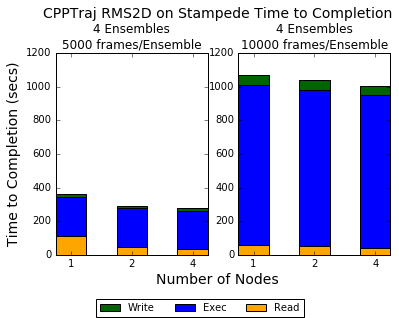

In [35]:
a=plt.figure()
plt.suptitle('CPPTraj RMS2D on Stampede Time to Completion',y=1.06,fontsize=14)
plt.subplot(1,2,1)
plt.ylabel('Time to Completion (secs)',fontsize=14)
n_groups=3
index=np.arange(n_groups)
bar_width=0.5
opacity=1.0
plt.bar(index,[small_1_writ_mpi+small_1_exec_mpi+small_1_read_mpi,small_2_writ_mpi+small_2_exec_mpi+small_2_read_mpi,small_4_writ_mpi+small_4_exec_mpi+small_4_read_mpi],bar_width,alpha=opacity,color='darkgreen',label='Write')
plt.bar(index,[small_1_exec_mpi+small_1_read_mpi,small_2_exec_mpi+small_2_read_mpi,small_4_exec_mpi+small_4_read_mpi],bar_width,alpha=opacity,color='blue',label='Exec')
plt.bar(index,[small_1_read_mpi,small_2_read_mpi,small_4_read_mpi],bar_width,alpha=opacity,color='orange',label='Read')
plt.title('4 Ensembles'+'\n'+'5000 frames/Ensemble')
plt.xticks(index+0.5*bar_width,('1','2','4'))
plt.ylim(ymax=1200)
plt.subplot(1,2,2)
n_groups=3
index=np.arange(n_groups)
bar_width=0.5
opacity=1.0
b1=plt.bar(index,[med_1_writ_mpi+med_1_exec_mpi+med_1_read_mpi,med_2_writ_mpi+med_2_exec_mpi+med_2_read_mpi,med_4_writ_mpi+med_4_exec_mpi+med_4_read_mpi],bar_width,alpha=opacity,color='darkgreen',label='Write')
b2=plt.bar(index,[med_1_exec_mpi+med_1_read_mpi,med_2_exec_mpi+med_2_read_mpi,med_4_exec_mpi+med_4_read_mpi],bar_width,alpha=opacity,color='blue',label='Exec')
b3=plt.bar(index,[med_1_read_mpi,med_2_read_mpi,med_4_read_mpi],bar_width,alpha=opacity,color='orange',label='Read')
plt.title('4 Ensembles'+'\n'+'10000 frames/Ensemble')
plt.xticks(index+0.5*bar_width,('1','2','4'))
a.text(0.5,0.10,'Number of Nodes',ha='center',fontsize=14)
lgd=plt.figlegend((b1,b2,b3),('Write','Exec','Read'),
              loc='lower center',ncol=3,fontsize=10,borderaxespad=0.15)
a.subplots_adjust(bottom=0.20)
a.savefig('cpptraj-native.png',dpi=800,bbox_extra_artists=(lgd,))

In [5]:
index = np.arange(3)
width = 0.35
opacity = 1.0

plt.bar(index,DoneReduce,width,yerr=DoneReduceStd,color='red',alpha=opacity)

['r']
['m']
['s']
['d']
['.']
['c']
['s']
['v']


In [ ]:
help